In [21]:
# random forest regressor on 20m resolution images

import numpy as np
import pandas as pd
import sklearn
import math

In [22]:
df = pd.read_csv(r"./dataset-Icheon&CHL/2000_20m_final_20221106.csv", low_memory = False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             279 non-null    int64  
 1   xcoord(long)   279 non-null    float64
 2   ycoord(lat)    279 non-null    float64
 3   sampling date  279 non-null    object 
 4   sensing date   279 non-null    object 
 5   B2             279 non-null    int64  
 6   B3             279 non-null    int64  
 7   B4             279 non-null    int64  
 8   B5             279 non-null    int64  
 9   B6             279 non-null    int64  
 10  B7             279 non-null    int64  
 11  B8A            279 non-null    int64  
 12  B11            279 non-null    int64  
 13  B12            279 non-null    int64  
 14  NDVI           279 non-null    float64
 15  BSI            279 non-null    float64
 16  EVI            279 non-null    float64
 17  AVI            279 non-null    float64
 18  SAVI      

In [24]:
df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','SOC']])

In [25]:
df.head()

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,SOC
0,2020,2555,3095,3264,3774,4137,4234,5107,4041,0.155410,0.134754,0.71
1,1640,2002,2397,2781,3036,3232,3188,3986,3095,0.141629,0.138703,0.71
2,1929,2325,2793,3124,3434,3429,3635,4849,3928,0.130989,0.157353,0.71
3,2387,2955,3646,3441,4298,4607,4869,5624,4324,0.143629,0.121869,0.71
4,3075,3914,4958,5340,5515,5755,5967,6441,4969,0.092357,0.115307,0.86


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
x = df.iloc[:, :-1]
print(x)

       B2    B3    B4    B5    B6    B7   B8A   B11   B12      NDVI       BSI
0    2020  2555  3095  3264  3774  4137  4234  5107  4041  0.155410  0.134754
1    1640  2002  2397  2781  3036  3232  3188  3986  3095  0.141629  0.138703
2    1929  2325  2793  3124  3434  3429  3635  4849  3928  0.130989  0.157353
3    2387  2955  3646  3441  4298  4607  4869  5624  4324  0.143629  0.121869
4    3075  3914  4958  5340  5515  5755  5967  6441  4969  0.092357  0.115307
..    ...   ...   ...   ...   ...   ...   ...   ...   ...       ...       ...
274  2027  2407  2756  3122  3377  3449  3649  4283  3924  0.139422  0.107196
275  1895  2369  2891  3165  3277  3394  3603  4378  3873  0.109640  0.138717
276  1819  2208  2595  2881  3015  3146  3342  3940  3566  0.125821  0.117476
277  2043  2483  2853  3178  3425  3555  3656  4255  3901  0.123368  0.110018
278  1891  2344  2834  3052  3162  3352  3576  3887  3244  0.115757  0.102888

[279 rows x 11 columns]


In [28]:
# normalize1
from sklearn.preprocessing import minmax_scale

In [29]:
X_MinMax_scaled = minmax_scale(x, axis=0, copy=True)
print(X_MinMax_scaled)

[[0.11469967 0.17494973 0.2528134  ... 0.32720672 0.80089375 0.37735597]
 [0.         0.01608733 0.07013871 ... 0.11254822 0.71308381 0.42044323]
 [0.08723212 0.10887676 0.1737765  ... 0.30156569 0.64528638 0.62391163]
 ...
 [0.05402958 0.07526573 0.1219576  ... 0.21942364 0.61235411 0.18885596]
 [0.12164202 0.15426602 0.18947919 ... 0.29543907 0.59672062 0.10748783]
 [0.07576215 0.11433496 0.18450667 ... 0.14635807 0.54822344 0.02970069]]


In [30]:
# normalize2
# band 값만 10000으로 나누기
df['B2'] = df['B2']/10000
df['B3'] = df['B3']/10000
df['B4'] = df['B4']/10000
df['B5'] = df['B5']/10000
df['B6'] = df['B6']/10000
df['B7'] = df['B7']/10000
df['B8A'] = df['B8A']/10000
df['B11'] = df['B11']/10000
df['B12'] = df['B12']/10000
print(df)

         B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.2020  0.2555  0.3095  0.3264  0.3774  0.4137  0.4234  0.5107  0.4041   
1    0.1640  0.2002  0.2397  0.2781  0.3036  0.3232  0.3188  0.3986  0.3095   
2    0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
3    0.2387  0.2955  0.3646  0.3441  0.4298  0.4607  0.4869  0.5624  0.4324   
4    0.3075  0.3914  0.4958  0.5340  0.5515  0.5755  0.5967  0.6441  0.4969   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
274  0.2027  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
275  0.1895  0.2369  0.2891  0.3165  0.3277  0.3394  0.3603  0.4378  0.3873   
276  0.1819  0.2208  0.2595  0.2881  0.3015  0.3146  0.3342  0.3940  0.3566   
277  0.2043  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   
278  0.1891  0.2344  0.2834  0.3052  0.3162  0.3352  0.3576  0.3887  0.3244   

         NDVI       BSI   SOC  
0    0.155410  0.13

In [31]:
y = df.iloc[:, -1:]

In [32]:
print(y)

      SOC
0    0.71
1    0.71
2    0.71
3    0.71
4    0.86
..    ...
274  3.22
275  3.30
276  3.30
277  3.30
278  2.51

[279 rows x 1 columns]


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25, random_state=0)

In [34]:
##########모델 생성

model = RandomForestRegressor()

In [35]:
### Tree 최적화


In [36]:
##########모델 학습

model.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [37]:
##########모델 검증

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.9315791678276888
0.5863139199818876


In [38]:
# R-squared

model.score(x.values,y.values)

0.837755460523668

In [39]:
print(x.values.shape)
print(model.predict(x.values).shape)
print(y.values.shape)

(279, 11)
(279,)
(279, 1)


In [40]:
# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')
plt.title('SOC (Random Forest Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()

NameError: name 'plt' is not defined

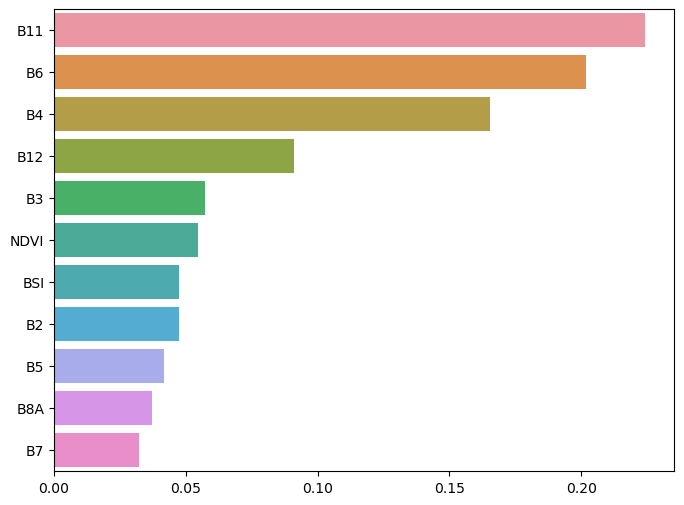

In [41]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()